Logistic regression: Despite its name it is used for classification problems.

The output of logistic regression is probabilities.

Import libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV ,KFold
from sklearn.metrics import roc_curve, roc_auc_score

# warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load the dataset
df = pd.read_csv('churn.csv')
df.head()

,CustomerID,Gender,SeniorCitizen,Tenure,MonthlyCharges,Contract,PaymentMethod,Churn,TotalCharges
0,0,Male,0,55,111.88,Two year,Mailed check,0,6153.40
1,1,Female,1,36,58.70,Two year,Electronic check,0,2113.20
2,2,Male,0,37,118.86,One year,Electronic check,0,4397.82
3,3,Male,1,14,96.14,Month-to-month,Mailed check,1,1345.96
4,4,Male,1,27,28.05,Two year,Mailed check,0,757.35


In [13]:
# One-hot encoding
df = pd.get_dummies(df.drop('CustomerID', axis=1), drop_first=True)

# Split features & target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [14]:
# Fit the model
model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Predicting Probabilities

In [15]:
# predic probabilities
y_pred_probs = model.predict_proba(X_test)[:,1]
# The second column is the probability of the positive class

# Print the first five predicted probabilities
print(y_pred_probs.mean())

0.2693695717863464


It can be seen base on the result the first observation has churned since the probablity is less than 0.5

Probability Threshold

Default threshold is 0.5 and is applicable to other model.

Effect of varying threshold can be observed using ROC Curve

Recieve Operating Characteristic Curve (ROC)

Is a plot of true positive rate (tpr) against the false positive rate (fpr).

The ROC curve is use to understand the effect of variation in the threshold. If threshold is 0, it means the model predicted 1 for all observations and vice versa.

Plot the ROC curve

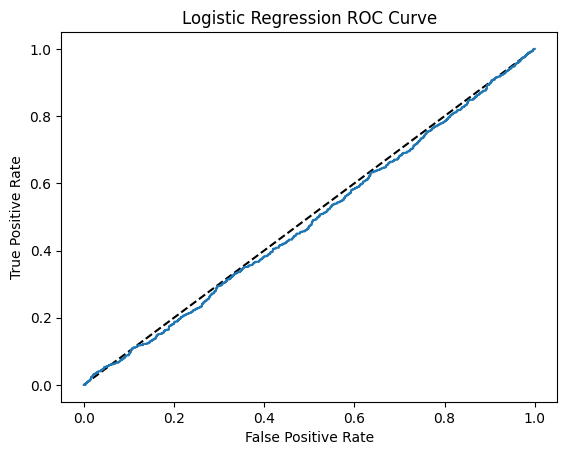

In [16]:
# Plot the roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

ROC AUC (area under the curve) to measure the score of the model

In [17]:
print(roc_auc_score(y_test, y_pred_probs))

0.486592951171242


The model performance 48.66% which it perform worse than a model making random guesses.

Hyperparameters Turning

Process of choosing the parameters (alpha, n_neighbors) to produce optimized model.

1. Grid search cross validation
2. Randomized Search Cross Validation

In [18]:
# Grid search cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grids = {'alpha':np.arange(0.001, 1, 100),
        'solver':('liblinear', 'saga', 'newton-cg', 'lbfgs')}
ridge = Ridge()
grid_search = GridSearchCV(ridge, grids, cv=kf)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_, grid_search.best_score_)

{'alpha': np.float64(0.001), 'solver': 'saga'} -0.0013490981294109084


Grid search has limitation of searching through each of the parameter range defined. Example for 5 fold cv, 1 hyperparameter and 10 values means 50 fits.

To solve this a random search for the optimal value will be better

In [19]:
# Randomized Search Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grids = {'alpha':np.arange(0.001, 1, 100),
        'solver':('liblinear', 'saga', 'newton-cg', 'lbfgs')}
ridge = Ridge()
grid_search = RandomizedSearchCV(ridge, grids, cv=kf, n_iter=3)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_, grid_search.best_score_)

{'solver': 'saga', 'alpha': np.float64(0.001)} -0.0013490998145848422
